## Results: Multi-channel architectures

In [1]:
import sys
sys.path.append("C:/Users/matth/Documents/Martinos Center/mrtoct") 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
import utils.test_utils as utils
import os
import pickle
import numpy as np
import gc

In [2]:
path_model = "C:/Users/matth/Documents/Martinos Center/Models/DeepBrain/"
path_dataset = "C:/Users/matth/Documents/Martinos Center/mrtoct/datasets/"
path_notebook = "C:/Users/matth/Documents/Martinos Center/mrtoct/notebooks/"

### Python commands

Run these lines in the command prompt to generate the dataset and train models.

##### Preprocessing:

* <font color = blue>python preprocessing.py --dataset ctmask_nosqrt --no_sqrt --tanh --mask_opt 1</font>
* <font color = blue>python preprocessing.py --dataset ctmask_nosqrt_pct --no_sqrt --set_pct --tanh --mask_opt 1</font>

##### Training: 

###### ACM
* <font color = blue>python train.py --dataset ctmask_nosqrt --name ctmask_l1_l2 --l1_l2 --n_epochs 30</font>
* <font color = blue>python train.py --dataset ctmask_nosqrt --name ctmask_l1_l2 --l1_l2 --acm --n_epochs 30</font> (ACM 1)
* <font color = blue>python train.py --dataset ctmask_nosqrt --name ctmask_l1_l2 --l1_l2 --acm --n_epochs 30</font> (ACM 2)
* <font color = blue>python train.py --dataset ctmask_nosqrt --name ctmask_l1_l2 --l1_l2 --acm --n_epochs 30</font> (ACM 3)

###### pCT
* <font color = blue>python train.py --dataset ctmask_nosqrt_pct --name ctmask_l1_l2_pct --l1_l2 --n_epochs 30</font>
* <font color = blue>python train.py --dataset ctmask_nosqrt --name ctmask_l1_l2_resnet --l1_l2 --netG ResNet9 --n_epochs 30</font>
* <font color = blue>python train.py --dataset ctmask_nosqrt_pct --name ctmask_l1_l2_resnet_pct --l1_l2 --set_pct --netG ResNet9 --n_epochs 30</font>



### 3.4.1 Auto-context model 

In [15]:
model_names = ["ctmask_l1_l2", "ctmask_l1_l2_acm1", "ctmask_l1_l2_acm2", "ctmask_l1_l2_acm3"]
models, outputs = utils.retrieve_models(model_names, path_model)
trains, vals, bevels, begens, begts = utils.retrieve_history(outputs)

In [4]:
dataset = np.load(path_dataset + "ctmask_nosqrt" + "/valid_eval.npz")
metrics = utils.compute_val_metrics(models, model_names, dataset, bevels, begens, begts, acm = True)
metrics

100%|████████████████████████████████████████████████████████████████████████████████| 473/473 [02:34<00:00,  3.06it/s]


,MAE,$\sigma_{MAE}$,MSE,$\sigma_{MSE}$,PSNR,$\sigma_{PSNR}$,SSIM,$\sigma_{SSIM}$
,,,,,,,,
ctmask_l1_l2_acm1,0.0925,0.0258,0.0318,0.0011,34.4984,5.6889,0.9638,0.0126
ctmask_l1_l2_acm2,0.1023,0.0252,0.0351,0.0011,33.4856,4.8499,0.9626,0.0131
ctmask_l1_l2_acm3,0.0931,0.0256,0.0322,0.0011,34.3449,5.5987,0.9608,0.0136


##### Plot

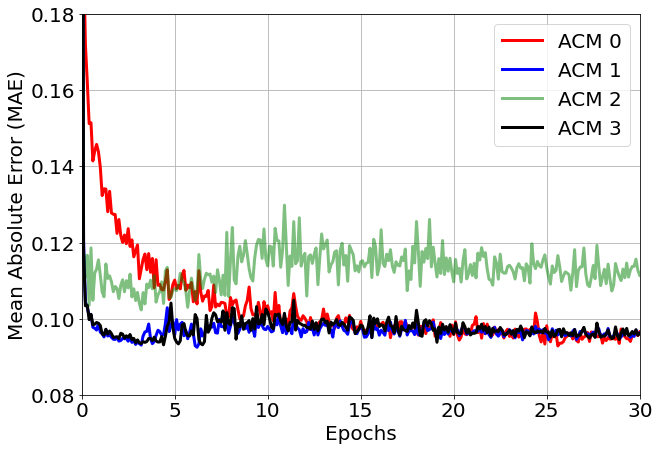

In [16]:
fig, ax = plt.subplots(figsize = (10,7))
x = np.linspace(0, 30, len(trains[0]))

ax.plot(x, vals[0], 'r', label = 'ACM 0', linewidth = 3)
ax.plot(x, vals[1], 'b', label = 'ACM 1', linewidth = 3)
ax.plot(x, vals[2], 'g', label = 'ACM 2', linewidth = 3, alpha = 0.5)
ax.plot(x, vals[3], 'k', label = 'ACM 3', linewidth = 3)

#ax.set_title("Auto-Context Models, validation curves", fontsize = 22)
ax.set_xlabel("Epochs", fontsize = 20)
ax.set_ylabel("Mean Absolute Error (MAE)", fontsize = 20)

ax.set_ylim([0, max(trains[0] + vals[0] + trains[1] + vals[1])])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim([0.08, 0.180])
ax.set_xlim([0, 30])
ax.legend(fontsize = 20, loc = 'upper right')
plt.grid("on")

plt.savefig(os.path.join(path_notebook,"acm_plot.png"), bbox_inches = 'tight')

##### Barplot

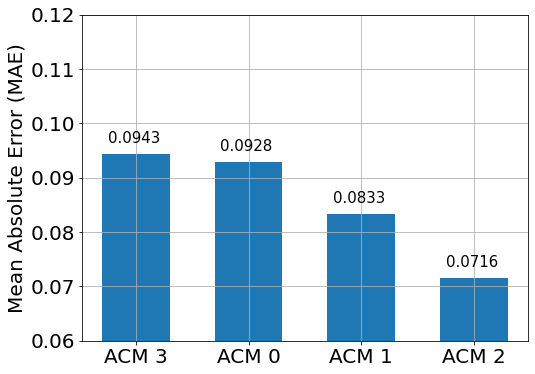

In [9]:
fig, ax = plt.subplots(figsize = (8, 6))

model_names = ["ACM 0", "ACM 1", "ACM 2", "ACM 3"]
MAE = []
for i in range(len(vals)):
    MAE.append(np.min(vals[i]))

labels_sorted = [x for _, x in sorted(zip(MAE, model_names), reverse = True)]
MAE_sorted = sorted(MAE, reverse = True)
#MAE_sorted = [i*100 for i in MAE_sorted]

width = 0.6
for i in range(len(MAE_sorted)):
    ax.text(s = "%.4f " %MAE_sorted[i], y = MAE_sorted[i] + 0.002, x=i - width / 2 + 0.05, fontsize=15)
    
X_axis = np.arange(len(MAE_sorted))
ax.bar(X_axis, MAE_sorted, width = width)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(X_axis, labels_sorted)
#ax.set_xlabel("Models", fontsize = 20)
ax.set_ylabel("Mean Absolute Error (MAE)", fontsize = 20)
#ax.set_title("Best Performance (after 30 epochs)", fontsize = 20)
ax.set_ylim([0.06, 0.12])
ax.grid('on')

os.chdir("C:/Users/matth/Documents/Martinos Center/ISMRM presentation/")
plt.savefig(os.path.join(path_notebook, "acm_barplot.png"), bbox_inches = 'tight')
plt.show()

### 3.4.2 pCT-derived porosity as a second channel

In [ ]:
model_names = ["ctmask_l1_l2", "ctmask_l1_l2_pct", "ctmask_l1_l2_resnet", "ctmask_l1_l2_resnet_pct"]
models, outputs = utils.retrieve_models(model_names, path_model)
trains, vals, bevels, begens, begts = utils.retrieve_history(outputs)

In [6]:
dataset1 = np.load(path_dataset + "ctmask_nosqrt" + "/valid_eval.npz")
dataset2 = np.load(path_dataset + "ctmask_nosqrt_pct" + "/valid_eval.npz")
datasets = [dataset1, dataset2, dataset1, dataset2]
metrics = utils.compute_val_metrics(models, model_names, datasets, bevels, begens, begts)
metrics

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:27<00:00, 51.82s/it]


,MAE,$\sigma_{MAE}$,MSE,$\sigma_{MSE}$,PSNR,$\sigma_{PSNR}$,SSIM,$\sigma_{SSIM}$
,,,,,,,,
ctmask_l1_l2,0.0928,0.0259,0.0325,0.0012,34.2615,5.6593,0.9655,0.0127
ctmask_l1_l2_pct,0.0833,0.0192,0.0256,0.0006,36.6505,4.3267,0.9622,0.0130
ctmask_l1_l2_resnet,0.0716,0.0174,0.0197,0.0004,39.2760,4.9133,0.9578,0.0153
ctmask_l1_l2_resnet_pct,0.0943,0.0233,0.0314,0.0010,34.6050,4.3307,0.9269,0.0229


##### Plot

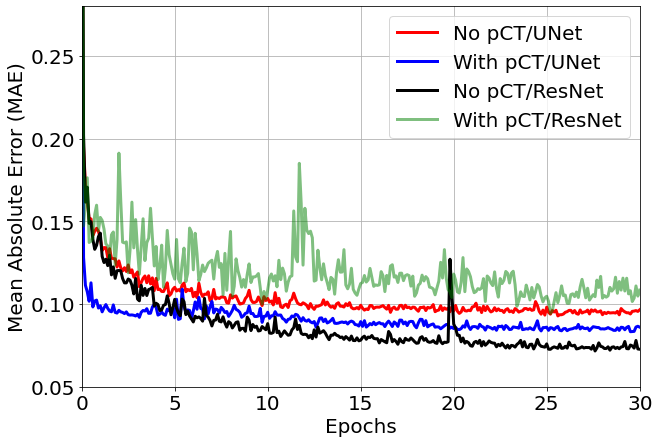

In [8]:
fig, ax = plt.subplots(figsize = (10,7))
x = np.linspace(0, 30, len(trains[0]))

ax.plot(x, vals[0], 'r', label = 'No pCT/UNet', linewidth = 3)
ax.plot(x, vals[1], 'b', label = 'With pCT/UNet', linewidth = 3)
#x_resnet = np.linspace(0, 15 * len(trains[2]) / len(trains[0]), len(trains[2]))
ax.plot(x, vals[2], 'k', label = 'No pCT/ResNet', linewidth = 3)
ax.plot(x, vals[3], 'g', label = 'With pCT/ResNet', linewidth = 3, alpha = 0.5)

ax.set_xlabel("Epochs", fontsize = 20)
ax.set_ylabel("Mean Absolute Error (MAE)", fontsize = 20)

ax.set_ylim([0, max(trains[0] + vals[0] + trains[1] + vals[1])])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim([0.05, 0.280])
ax.set_xlim([0, 30])
ax.legend(fontsize = 20, loc = 'upper right')
plt.grid("on")
#plt.gcf()

os.chdir("C:/Users/matth/Documents/Martinos Center/ISMRM presentation/")
plt.savefig(os.path.join(path_notebook, "pct_plot.png"), bbox_inches = 'tight')

##### Barplot

['pCT/\nResNet', 'No pCT/\nUNet', 'pCT/\nUNet', 'No pCT/\nResNet']
[0.0943, 0.0928, 0.0833, 0.0716]


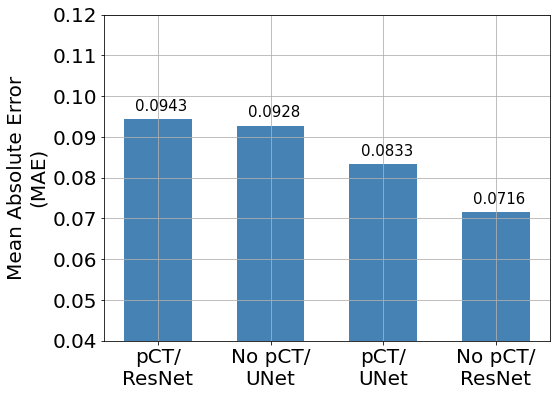

In [31]:
labels = ["No pCT/\nUNet", "pCT/\nUNet", "pCT/\nResNet", "No pCT/\nResNet"]
MAE = [0.0928, 0.0833, 0.0943, 0.0716]

fig, ax = plt.subplots(figsize = (8, 6))

labels_sorted = [x for _, x in sorted(zip(MAE, labels), reverse = True)]
MAE_sorted = sorted(MAE, reverse = True)

print(labels_sorted)
print(MAE_sorted)

for i in range(len(MAE_sorted)):
    ax.text(s = '%.4f'%MAE_sorted[i], y = MAE_sorted[i] + 0.002, x=i - 0.2, fontsize=15)
    
X_axis = np.arange(len(MAE_sorted))
  
ax.bar(X_axis, MAE_sorted, width = 0.6, color = 'steelblue')

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(X_axis, labels_sorted)

ax.set_ylabel("Mean Absolute Error\n(MAE)", fontsize = 20)
#ax.set_title("Best Performance (after 30 epochs)", fontsize = 20)
ax.set_ylim([0.04, 0.12])
ax.grid('on')

os.chdir("C:/Users/matth/Documents/Martinos Center/ISMRM presentation/")
plt.savefig(os.path.join(path_notebook, "pct_barplot.png"), bbox_inches = 'tight')
plt.show()